In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read csv and create a dataframe
df = pd.read_csv('Resources/Data_science_&stem_salaries.csv',
                      parse_dates=['timestamp'])
print(df.shape)

(62642, 29)


In [6]:
df.sample(5).T

,1088,34997,29130,14743,53037
timestamp,2018-09-04 09:06:03,2020-11-11 09:07:19,2020-09-07 00:38:21,2020-01-08 15:53:03,2021-06-01 11:53:30
company,Google,Pluralsight,Medallia,Uber,Lenovo
level,T3,P4,L4,L4,Band 8
title,Software Engineer,Software Engineer,Technical Program Manager,Software Engineer,Software Engineer
totalyearlycompensation,171000,156000,280000,258000,150000
location,"New York, NY","South Jordan, UT","San Francisco, CA","Palo Alto, CA","Morrisville, NC"
yearsofexperience,0.0,6.0,5.0,2.0,6.0
yearsatcompany,0.0,1.0,2.0,0.0,2.0
tag,Full Stack,Full Stack,Full Stack,Distributed Systems (Back-End),Distributed Systems (Back-End)
basesalary,0.0,139000.0,160000.0,155000.0,135000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  float64       
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [10]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# we leave a holdout set, not to open until finishing the modeling
from sklearn.model_selection import train_test_split

df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
df = df[['timestamp','company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education']]

df.shape # our real dataset consists of 14 features and 1 target variable

(50113, 15)

/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='totalyearlycompensation'>

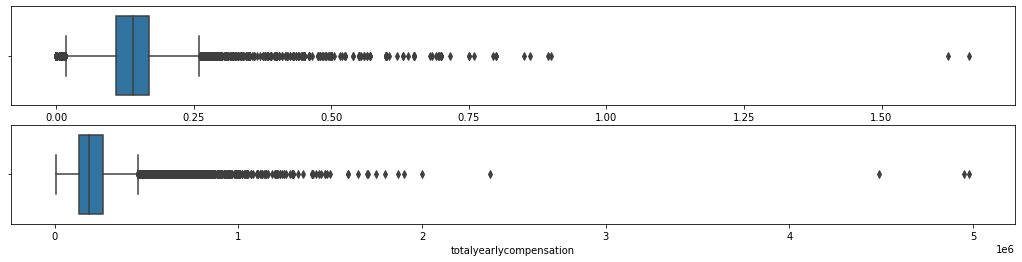

In [13]:
import seaborn as sns 
fig, ax = plt.subplots( nrows = 2, figsize = (18,4) )  

sns.boxplot( df.basesalary, ax = ax[0] )

sns.boxplot( df.totalyearlycompensation, ax = ax[1] ,)

In [14]:
df.corr()['basesalary']

totalyearlycompensation    0.672887
yearsofexperience          0.372450
yearsatcompany             0.145297
basesalary                 1.000000
stockgrantvalue            0.471974
bonus                      0.390428
Name: basesalary, dtype: float64

### "stockgrantvalue" and "totalyearlycompensation" both have high correlation with base salary, but in reality we shouldn't use this columns because they won't be available once we    want to predict for a new position. These columns are invalid for a predictive model so I'll need to remove them

In [15]:
# I remove very low salary values which could be results of failed scraping, and very high values (2% of outliers)
df = df[df.basesalary > 10 ]
q98 = np.quantile(df.basesalary,0.98)
print(q98)
df.loc[ df.basesalary >q98 , 'basesalary'] =q98

252000.0


In [16]:
df.isna().sum()

timestamp                      0
company                        5
level                         98
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          621
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     14584
Race                       30359
Education                  23954
dtype: int64

In [17]:
# drop rows in columns which NAs are very few and so dropping the whole row doesn't remove that much information from the data
df = df.dropna(subset = ['level', 'tag', 'company'])
df.isna().sum()


timestamp                      0
company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                            0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     14198
Race                       29703
Education                  23313
dtype: int64

In [18]:
# new variable keeping only date and assigning it a ranking based on chronology
df['datestamp']= df.timestamp.dt.date

df_timestamp = df.datestamp.drop_duplicates().sort_values().reset_index().reset_index()[['level_0','datestamp']]

df = df.merge(df_timestamp).rename(columns = {'level_0': 'date_rank'})

del df['datestamp']
del df['timestamp']

## categorical variables encoding 
https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [19]:
cat_feats = ['company', 'level', 'title', 'location', 'tag', 'gender', 'Race', 'Education']

In [20]:
df[cat_feats].describe().T.sort_values('unique')

,count,unique,top,freq
gender,33307,4,Male,27550
Race,17802,5,Asian,9352
Education,24192,5,Master's Degree,12300
title,47505,15,Software Engineer,31134
location,47505,949,"Seattle, WA",6449
company,47505,1528,Amazon,5986
level,47505,2499,L4,3789
tag,47505,2570,Full Stack,8748
